In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image
import cv2
import random

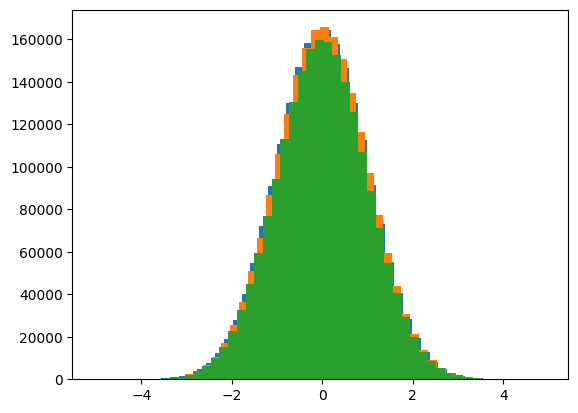

In [2]:
r = np.random.randn(128, 128, 128, 3)
plt.hist(r[..., 0].flatten(), bins=50)
plt.hist(r[..., 1].flatten(), bins=50)
plt.hist(r[..., 2].flatten(), bins=50)
plt.show()

In [64]:
images = glob.glob("/work/vision_lab/andrew.heschl/Documents/Dataset/ClassificationPipeline/preprocessed/Dataset_large_421/fold_0/train/imagesTr/*")
random.shuffle(images)
img = np.stack([cv2.resize(np.load(x)[:, 0:512, 0:512].transpose((1, 2, 0)), (128, 128), interpolation=cv2.INTER_CUBIC) for x in images[0:64]], axis=0)

In [66]:
img -= np.min(img)
img /= np.max(img)
img*=255
print(img.min(), img.max())

0.0 255.0


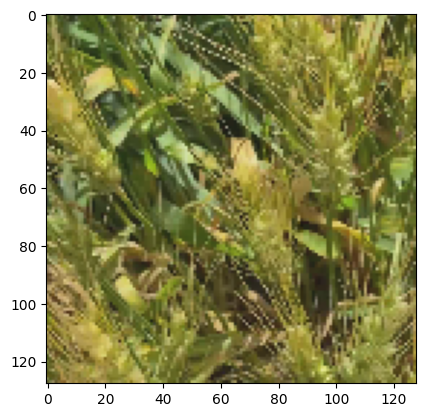

In [67]:
plt.imshow(img[0].astype(np.uint8))

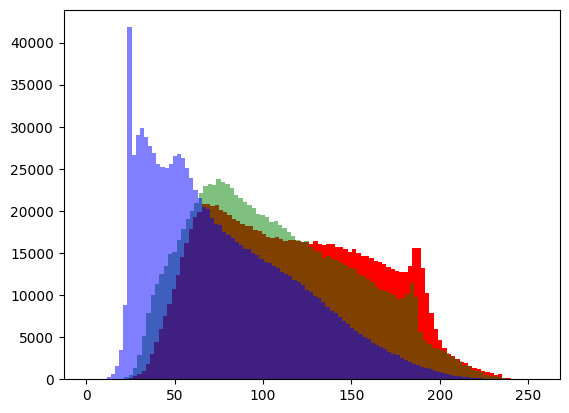

In [68]:

plt.hist(img[:, :, :, 0].flatten(), bins=101, color='r')
plt.hist(img[:, :, :, 1].flatten(), bins=101, color='g', alpha=0.5)
plt.hist(img[:, :, :, 2].flatten(), bins=101, color='b', alpha=0.5)
plt.show()

In [69]:
import pandas as pd
import seaborn as sns

def plot_b(color, alpha=1):
    data = pd.read_csv(f"./inference_bins_{color}.csv")
    recent = data.iloc[-1][f"concat_no_gan - generated {str(color).upper()} distribution"]
    recent = eval(recent)
    values = recent["values"]
    bins = recent["bins"]
    print(len(bins), len(values))
    print(len(bins))
    # plot the precomputed values and bins to a histogram using seaborn or matplotlib. sns.histplot(values, bins=bins) is not working properly
    # sns.histplot(values, bins=bins) and neither is plt.hist(values, bins=bins)
    # this is because the values are already binned by wandb
    # so we can use plt.bar to plot the values
    plt.bar(bins[:-1], values, width=np.diff(bins), color=color, alpha=alpha)



101 100
101
101 100
101
101 100
101


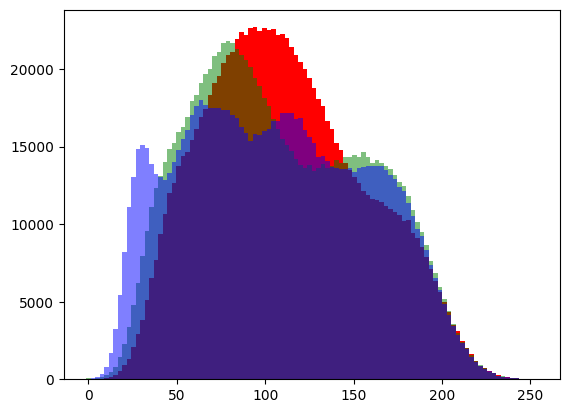

In [70]:
plot_b("r")
plot_b("g", alpha=0.5)
plot_b("b", alpha=0.5)
